In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.tsa.stattools import adfuller, coint

In [2]:
bist30h = [
    "TUPRS.IS",
    "VAKBN.IS",
    "KRDMD.IS",
    "DOHOL.IS",
    "AKBNK.IS",
    "TKFEN.IS",
    "FROTO.IS",
    "GARAN.IS",
    "KOZAA.IS",
    "HALKB.IS",
    "TCELL.IS",
    "KOZAL.IS",
    "VESTL.IS",
    "YKBNK.IS",
    "TTKOM.IS",
    "BIMAS.IS",
    "PETKM.IS",
    "SISE.IS",
    "ARCLK.IS",
    "EREGL.IS",
    "SASA.IS",
    "SAHOL.IS",
    "EKGYO.IS",
    "THYAO.IS",
    "PGSUS.IS",
    "ISCTR.IS",
    "KCHOL.IS",
    "ASELS.IS",
    "TAVHL.IS",
    "GUBRF.IS",
]

In [3]:
df = yf.download(bist30h, start="2016-01-01")
df = df["Adj Close"]
df.fillna(method="pad", inplace=True)
df

[*********************100%***********************]  30 of 30 completed


,AKBNK.IS,ARCLK.IS,ASELS.IS,BIMAS.IS,DOHOL.IS,EKGYO.IS,EREGL.IS,FROTO.IS,GARAN.IS,GUBRF.IS,...,SISE.IS,TAVHL.IS,TCELL.IS,THYAO.IS,TKFEN.IS,TTKOM.IS,TUPRS.IS,VAKBN.IS,VESTL.IS,YKBNK.IS
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,5.135059,11.366225,4.085886,20.888487,0.474552,2.170356,1.479007,21.557665,6.369809,5.576539,...,2.254668,13.452858,6.571138,7.39,3.170417,4.643315,46.929371,3.657049,4.738195,2.061937
2016-01-01,5.135059,11.366225,4.085886,20.888487,0.474552,2.170356,1.479007,21.557665,6.369809,5.576539,...,2.254668,13.452858,6.571138,7.39,3.170417,4.643315,46.929371,3.657049,4.738195,2.061937
2016-01-04,5.043088,11.146548,4.146434,20.664757,0.474552,2.128618,1.440085,21.600382,6.244560,5.380182,...,2.183989,13.083072,6.498124,7.14,3.076246,4.541265,47.873352,3.580662,4.599109,2.018066
2016-01-05,5.012432,11.569629,4.199718,20.746113,0.482877,2.153661,1.449816,21.571905,6.217721,5.301640,...,2.155717,13.164424,6.478211,7.24,3.068398,4.558272,47.603645,3.561566,4.636198,2.011798
2016-01-06,5.089074,11.829987,4.231205,20.481701,0.474552,2.162009,1.517928,21.628860,6.351916,5.242733,...,2.092106,12.949949,6.531310,7.21,3.044856,4.507247,49.390465,3.571114,4.710377,2.043135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,5.690000,31.799999,15.680000,73.599998,2.550000,1.820000,18.400000,167.600006,9.440000,51.000000,...,8.820000,24.020000,16.010000,12.79,14.350000,7.340000,98.900002,3.550000,28.480000,2.530000
2021-08-27,5.730000,32.139999,15.810000,72.199997,2.570000,1.820000,18.709999,168.800003,9.560000,50.200001,...,8.970000,23.639999,15.950000,12.68,14.490000,7.390000,99.599998,3.560000,28.719999,2.560000
2021-08-31,5.890000,32.119999,15.890000,71.849998,2.570000,1.840000,18.780001,171.800003,9.880000,51.849998,...,8.900000,23.520000,16.389999,12.68,14.750000,7.410000,101.699997,3.590000,28.680000,2.640000


In [4]:
# Find cointegrations
for i in df:
    res = adfuller(df[i])
    print(f"ADF Statistic for {i}: {res[0]}")
    print(f"p-value: {res[1]}")

for s1 in df.columns:
    for s2 in df.columns:
        if s1 != s2:
            res = coint(df[s1], df[s2], trend="nc")
            pval = res[1]
            if pval <= 0.05:
                print(f"{s1} and {s2} has cointegration, p-value: {pval}")

ADF Statistic for AKBNK.IS: -2.632924693560966
p-value: 0.08638152137006622
ADF Statistic for ARCLK.IS: -0.5459527296689446
p-value: 0.8827329399628783
ADF Statistic for ASELS.IS: -1.679091831355596
p-value: 0.4419159080878568
ADF Statistic for BIMAS.IS: 0.2829229218011971
p-value: 0.9765472909233414
ADF Statistic for DOHOL.IS: -0.5338384948861487
p-value: 0.8852422858745508
ADF Statistic for EKGYO.IS: -1.6240761129225603
p-value: 0.47059300278100263
ADF Statistic for EREGL.IS: 1.269115750917282
p-value: 0.9964302885538885
ADF Statistic for FROTO.IS: 0.978096958684715
p-value: 0.9940293849944797
ADF Statistic for GARAN.IS: -2.7542939235885404
p-value: 0.06510496068275883
ADF Statistic for GUBRF.IS: -0.1351323065035012
p-value: 0.9458248298119344
ADF Statistic for HALKB.IS: -1.350263628225586
p-value: 0.6058747237180142
ADF Statistic for ISCTR.IS: -2.443345251821302
p-value: 0.12987426451166084
ADF Statistic for KCHOL.IS: -1.4807094486903958
p-value: 0.5430316038076027
ADF Statistic for

C:\Users\murat\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


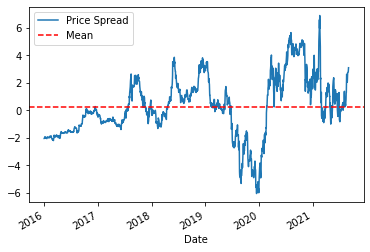

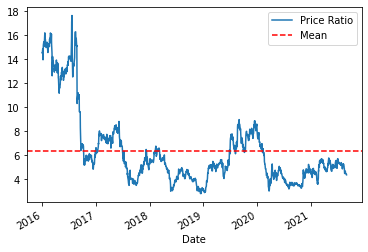

In [5]:
# I selected PGSUS.IS and KOZAA.IS for example
# Plot spread
s1 = df['PGSUS.IS']
s2 = df['KOZAA.IS']

s1 = add_constant(s1)
results = OLS(s2, s1).fit()
b = results.params['PGSUS.IS']

spreads = s2 - b * s1['PGSUS.IS']
spreads.plot()
plt.axhline(spreads.mean(), color='red', linestyle='--')
plt.legend(['Price Spread', 'Mean'])
plt.show()

# Plot ratio
ratio = s1['PGSUS.IS'] / s2
ratio.plot()
plt.axhline(ratio.mean(), color='red', linestyle='--')
plt.legend(['Price Ratio', 'Mean'])
plt.show()

C:\Users\murat\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\murat\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


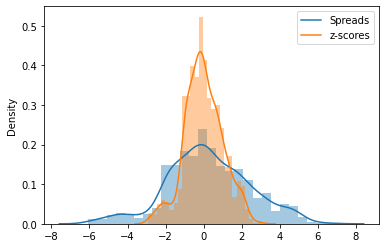

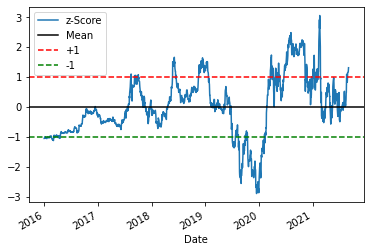

In [6]:
# z-score
sns.distplot(spreads)

zscores = (spreads - np.mean(spreads)) / np.std(spreads)
sns.distplot(zscores)

plt.legend(['Spreads', 'z-scores'])
plt.show()

zscores.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['z-Score', 'Mean', '+1', '-1'])
plt.show()

In [7]:
# Trade signal
signal = pd.DataFrame(
    {'signal': np.where(zscores > 1, 1, np.where(zscores < -1, -1, 0))},
    index=zscores.index)
signal

,signal
Date,
2015-12-31,-1
2016-01-01,-1
2016-01-04,-1
2016-01-05,-1
2016-01-06,0
...,...
2021-08-26,0
2021-08-27,1
2021-08-31,1


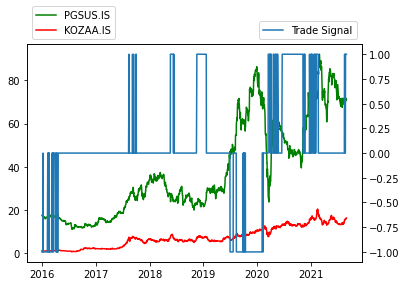

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(s1['PGSUS.IS'], label="PGSUS.IS", color="g")
ax1.plot(s2, label="KOZAA.IS", color="r")
ax2.plot(signal, label="Trade Signal")
ax1.legend(bbox_to_anchor=(0, 1), loc=3)
ax2.legend(bbox_to_anchor=(1, 1), loc=4)
plt.show()

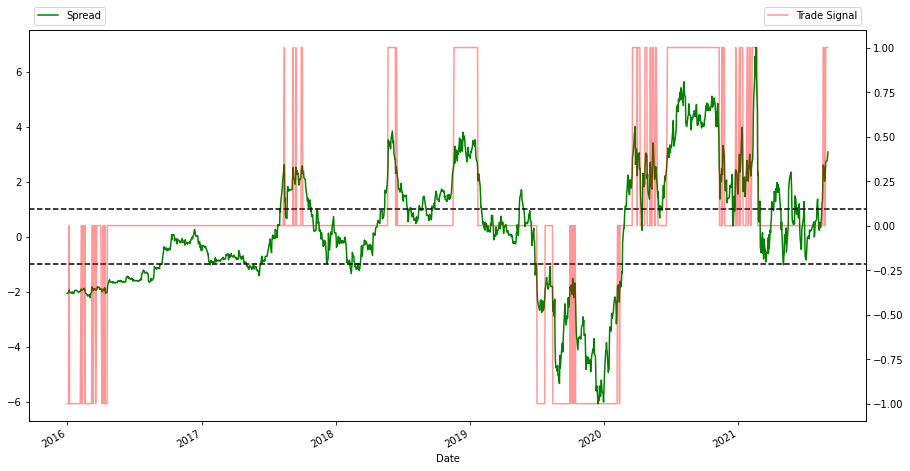

In [9]:
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()

spreads.plot(ax=ax1, label="Spread", color="g")
ax1.axhline(1.0, color='black', linestyle='--')
ax1.axhline(-1.0, color='black', linestyle='--')
ax2.plot(signal, label="Trade Signal", color="r", alpha=0.4)
ax1.legend(bbox_to_anchor=(0, 1), loc=3)
ax2.legend(bbox_to_anchor=(1, 1), loc=4)
plt.show()